In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from plots.plot_utils import config_plotting

# Configure plotting style
config_plotting()

# source data
result_dir = "../../../../Redbench/output/generated_workloads/"
dataset = "imdb"
redset_dataset = "serverless"
cluster_id = "cluster_0"
database_id = "database_0"
redset_path = "../../../../Redbench/data/full_serverless.parquet"

data = [
    ("generation", "ede5387599ee1e65c105eaa9b17c5c3c"),
]

workloads = [f"{key}_{value}" for key, value in data]

In [ ]:
import importlib

import plots.load_data_helper

importlib.reload(plots.load_data_helper)

from plots.load_data_helper import assemble_runs_dict

results = assemble_runs_dict(
    result_dir,
    dataset,
    redset_dataset,
    cluster_id,
    database_id,
    workloads,
    overwrite_redset_path=redset_path,
)

# flatten the results dict
runs_dict = {}
for workload_name, workload_dict in results.items():
    if workload_name.startswith("OLD_"):
        continue  # skip old workloads

    # hide the hash from the workload name
    workload_name = workload_name.rsplit("_", 1)[0]

    for run_name, df in workload_dict.items():
        if run_name == "redset":
            label = "Redset"
        else:
            label = f"{run_name} ({workload_name})"
        runs_dict[label] = df

for k in sorted(runs_dict.keys()):
    print(f"{k}: {len(runs_dict[k])} entries")

Found 1 parquet files in ../../../../Redbench/output/generated_workloads//imdb/serverless/cluster_0/database_0/generation_ede5387599ee1e65c105eaa9b17c5c3c/
Redset: 41624 entries
duckdb (generation): 1000 entries


In [ ]:
# create stub entry for duckdb rescache (result cache is not available for duckdb) - just to enable plotting
runs_dict["duckdb_rescache (generation)"] = runs_dict["duckdb (generation)"]

In [22]:
import importlib

import plots.load_data_helper

# importlib.reload(plots.run_baseline_rewriter)
importlib.reload(plots.load_data_helper)

from plots.load_data_helper import annotate_relative_runtime, group_by_system

per_system_dict = group_by_system(runs_dict)
per_system_dict = annotate_relative_runtime(
    per_system_dict, prune_queries_not_there_in_all_configs=True
)

Computing relative runtimes for redset with 41624/41624 baseline queries
Num queries reduced from 41624 to 41624 with `prune_queries_not_there_in_all_configs`
Skipping matching for system: duckdb as not present for baseline 
 ['generation']
Computing relative runtimes for redset with 41624/41624 baseline queries
Num queries reduced from 41624 to 41624 with `prune_queries_not_there_in_all_configs`
Computing relative runtimes for duckdb with 1000/1000 baseline queries
Num queries reduced from 1000 to 1000 with `prune_queries_not_there_in_all_configs`
Computing relative runtimes for redset with 41624/41624 baseline queries
Num queries reduced from 41624 to 41624 with `prune_queries_not_there_in_all_configs`
Skipping baseline_round_robin for system: duckdb as not present for baseline 
 ['generation']


In [ ]:
per_system_dict["duckdb"].keys()

dict_keys(['baseline', 'result'])

### Plot 1A

In [25]:
anonymize_dict = {
    "redset": "Redset",
    "duckdb": "System E",
}

system_color_dict = {
    "redset": "#326dda",
    "duckdb": "#aca128",
}

Tmp order: ['redset', 'duckdb']
Summary for Read-Only Worklaod:
     system                 wl_gen  speedup
0  System E  Production\nWorkloads      1.0
Summary for Read and Write:
     system                 wl_gen  speedup
0  System E  Production\nWorkloads      1.0


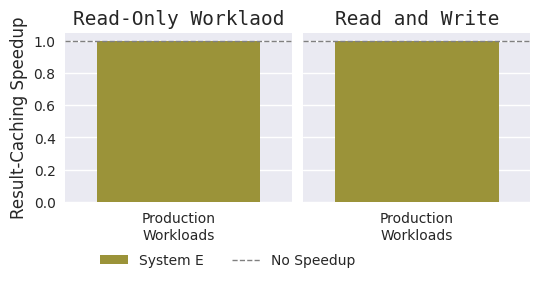

In [28]:
import plots.plot0

importlib.reload(plots.plot0)
from plots.plot0 import plot0

plot0(
    per_system_dict,
    anonymize_systems=True,
    anonymize_dict=anonymize_dict,
    system_color_dict=system_color_dict,
)

Tmp order: ['redset', 'duckdb']
Summary for SELECT:
     system                             wl_gen  relative_runtime  speedup
0  System E  $\mathbf{Redbench}$\n(Generation)               1.0      1.0
Summary for SELECT + DML:
     system                             wl_gen  relative_runtime  speedup
0  System E  $\mathbf{Redbench}$\n(Generation)               1.0      1.0


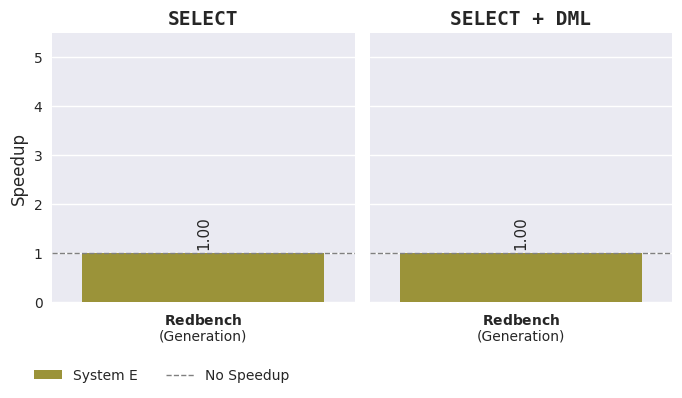

In [30]:
import plots.plot1a

importlib.reload(plots.plot1a)
from plots.plot1a import plot1a

# plot1a(
#     per_system_dict,
#     anonymize_systems=True,
#     anonymize_dict=anonymize_dict,
#     system_color_dict=system_color_dict,
#     boxplot=True,
# )
plot1a(
    per_system_dict,
    anonymize_systems=True,
    anonymize_dict=anonymize_dict,
    system_color_dict=system_color_dict,
    boxplot=False,
)

Plotting 1B for workload generation method: baseline_round_robin
Skipping duckdb for workload generation method baseline_round_robin as no data is available.
Skipping duckdb for workload generation method baseline_round_robin as no data is available.


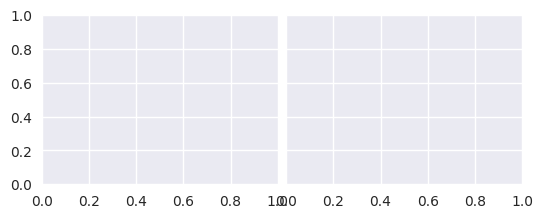

Plotting 1B for workload generation method: matching
Skipping duckdb for workload generation method matching as no data is available.
Skipping duckdb for workload generation method matching as no data is available.


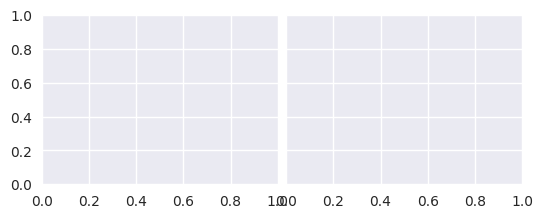

Plotting 1B for workload generation method: generation


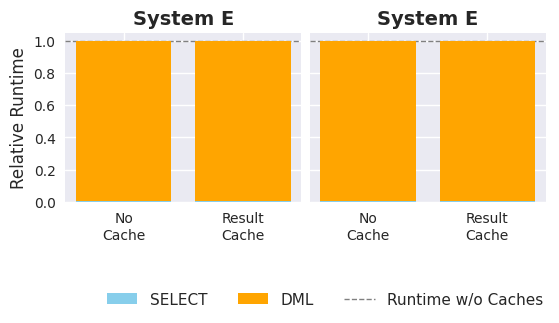

In [31]:
import plots.plot1b

importlib.reload(plots.plot1b)
from plots.plot1b import plot1b

plot1b(
    per_system_dict,
    wl_gen="baseline_round_robin",
    anonymize_systems=True,
    anonymize_dict=anonymize_dict,
)
plot1b(
    per_system_dict,
    wl_gen="matching",
    anonymize_systems=True,
    anonymize_dict=anonymize_dict,
)
plot1b(
    per_system_dict,
    wl_gen="generation",
    anonymize_systems=True,
    anonymize_dict=anonymize_dict,
)

Plotting 1E for workload generation method: generation


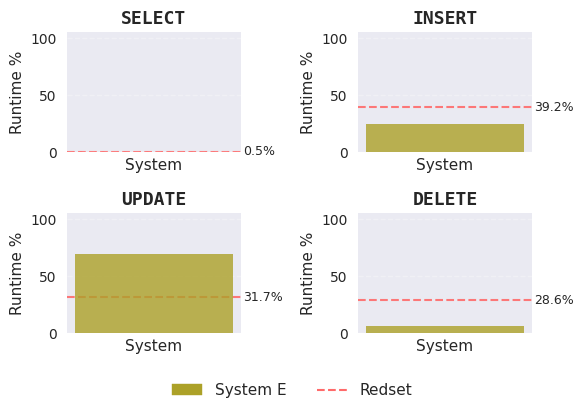


Runtime Percentage Summary:

REDSET:
  insert: 39.24%
  update: 31.66%
  delete: 28.62%
  select: 0.47%

SYSTEM E:
  update: 68.89%
  insert: 24.90%
  delete: 5.95%
  select: 0.27%


In [37]:
import plots.plot1e

importlib.reload(plots.plot1e)
from plots.plot1e import plot1e

plot1e(
    per_system_dict,
    wl_gen="generation",
    anonymize_systems=True,
    anonymize_dict=anonymize_dict,
    system_color_dict=system_color_dict,
)